In [1]:
%matplotlib notebook
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pds.read_csv("df3dimv5.csv")
df = df.loc[df['code'] > 0]

x1 = df['dim1']
y1 = df['dim2']
z1 = df['dim3']
code = df['code']

<IPython.core.display.Javascript object>


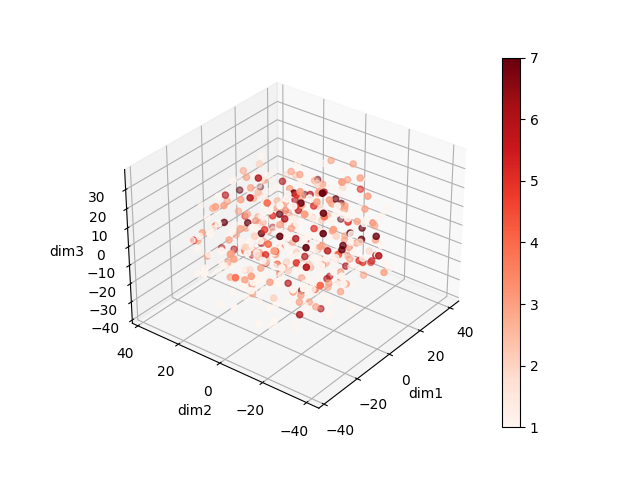

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(x1, y1, z1, c=code, cmap='Reds')
ax.set_xlabel('dim1')
ax.set_ylabel('dim2')
ax.set_zlabel('dim3')
plt.colorbar(p)
plt.show()

<IPython.core.display.Javascript object>


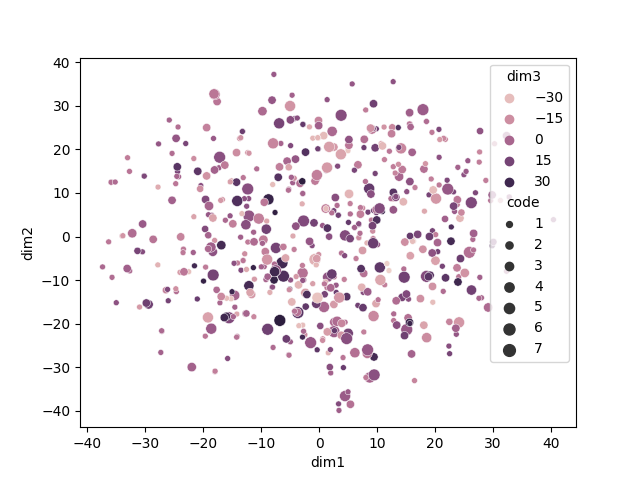

In [4]:
fig = plt.figure()
sns.scatterplot(data=df, x='dim1', y='dim2', hue='dim3', size='code')
plt.show()